In [4]:

# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    database="TwitterDB",
    charset = 'utf8'
)

Tweets Monitor: 
  2019-09-26 02:17:19  Pedofiles be like: if youre 15 Im 15 too scary ass ppl https://t.co/TlmKxNIp8k
  2019-09-26 02:17:19  SO sad! https://t.co/AqZcK8SAjZ
  2019-09-26 02:17:20  WTF? @Facebook declares that politicians are exempt from company policies that prohibit bigotry &amp; hate speech -- wh https://t.co/9TtOH2T7Xr
  2019-09-26 02:17:20  It's sad that this is a reality. https://t.co/GsuNbo8kxu
  2019-09-26 02:17:21  RT @alexkotch: SCOOP at @Sludge: Facebook is making millions of dollars in ad revenue from @splcenter-designated hate groups.

At least 38
  2019-09-26 03:06:14  RT @GameOverGreggy: Holy fuck! https://t.co/uVHD2CamWa
  2019-09-26 03:06:16  RT @dalyla_lucero: BREAK UP WITH HIM WTF? how is this even a QUESTION? some of you dont deserve kids at all https://t.co/MujxjZaXax
  2019-09-26 03:06:17  RT @Sludge: SCOOP Facebook is making millions of dollars in ad revenue from @splcenter-designated hate groups.

Our investigation finds t
  2019-09-26 03:06:23  

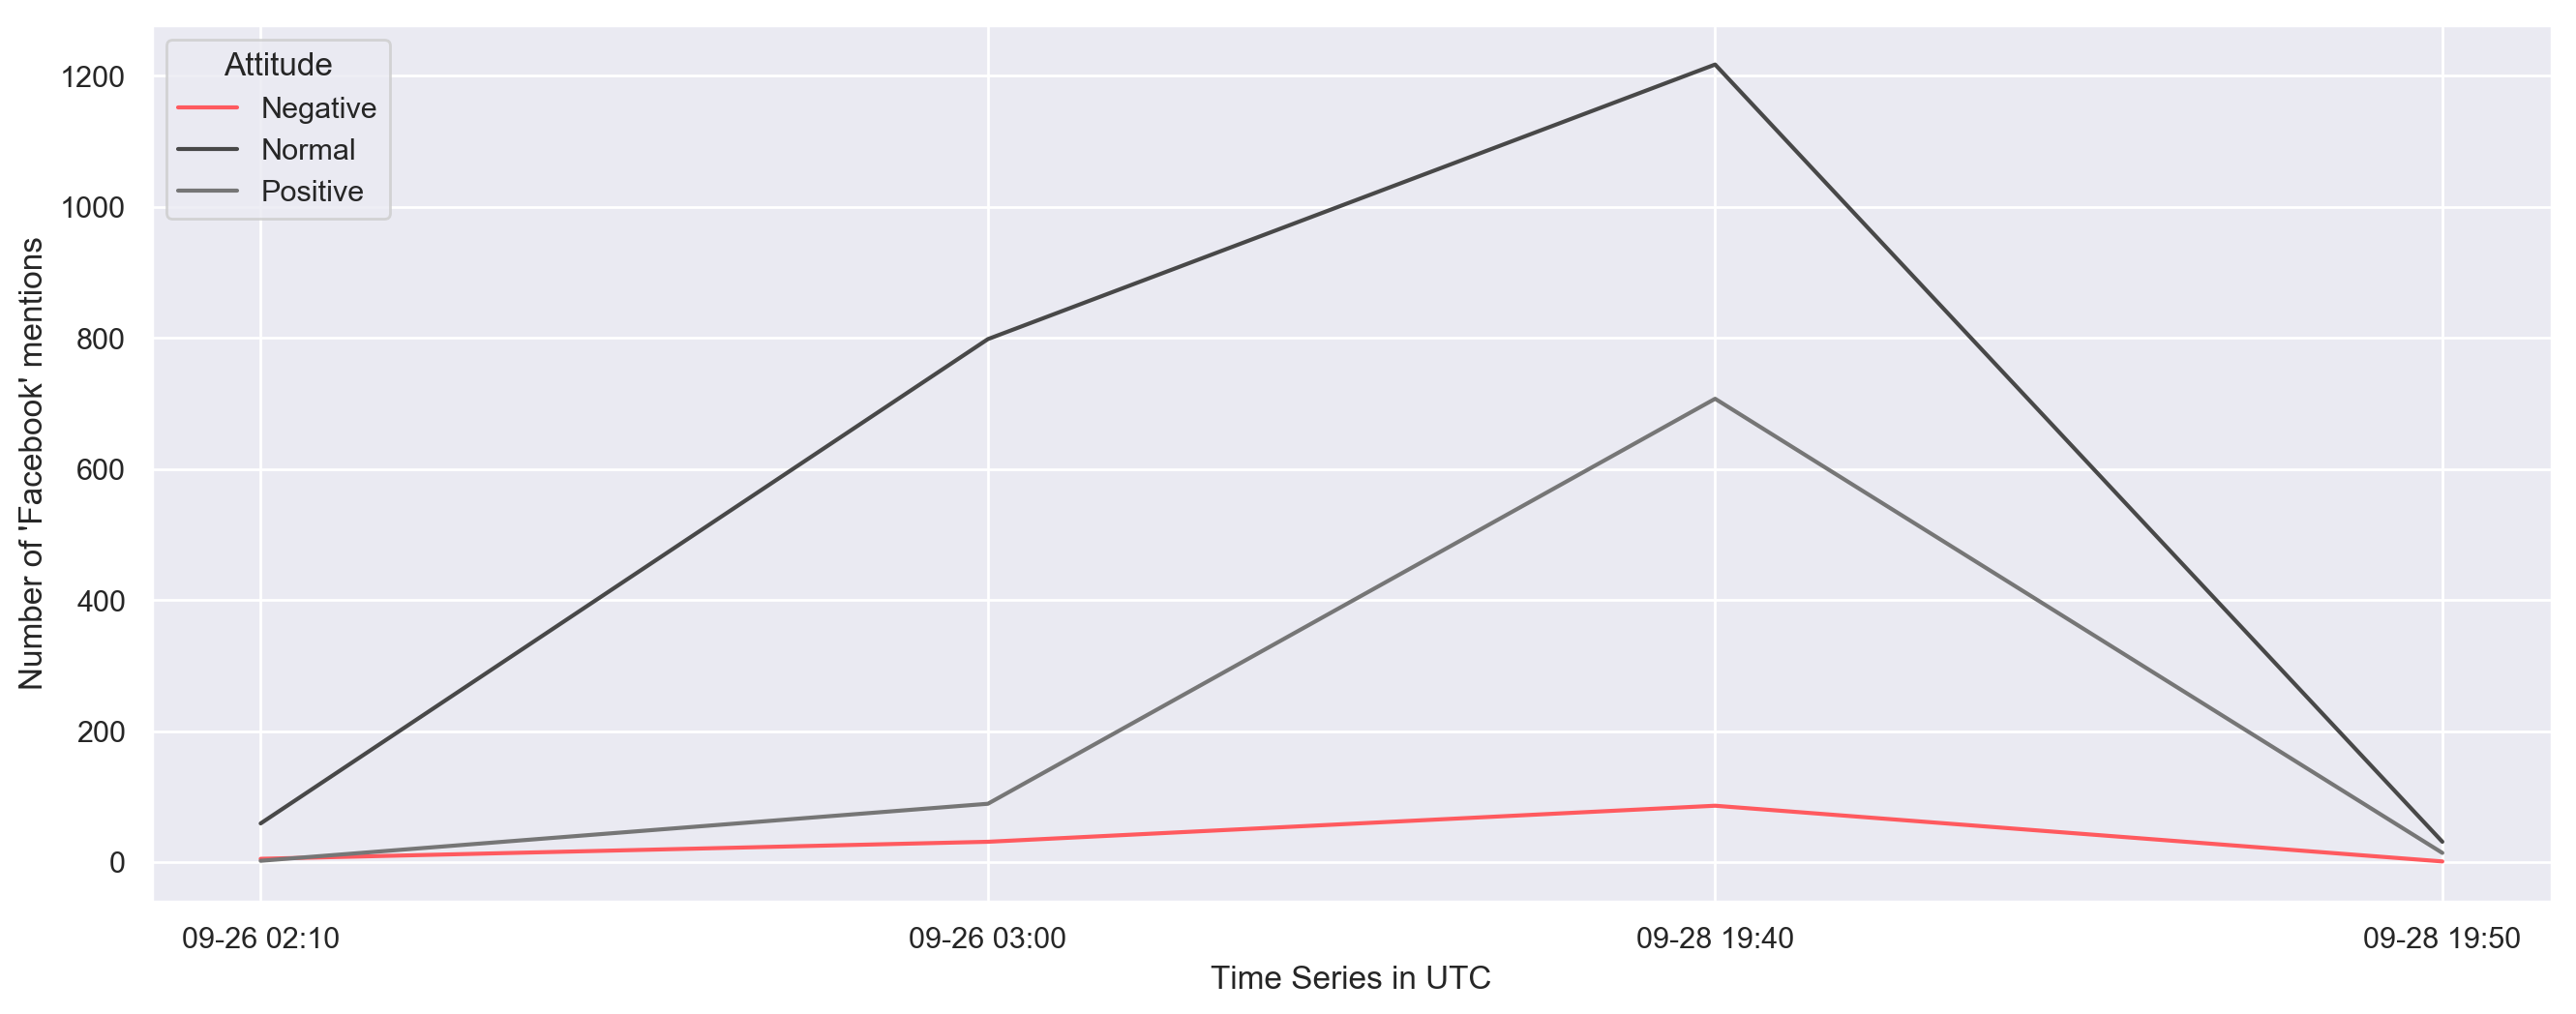

In [5]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [6]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="twitter-sentimometer")
location = geolocator.geocode("San Diego, CA")
print((location.latitude, location.longitude))
location.address

(39.9622601, -83.0007065)


'Columbus, Franklin County, Ohio, United States of America'